Loading training data...
Loading testing data...
Train shape: (5216, 10000) (5216,)
Test shape: (624, 10000) (624,)

 Training: SVM (Linear)
 SVM (Linear) Accuracy: 0.7532
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.97      0.35      0.52       234
   PNEUMONIA       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.68       624
weighted avg       0.81      0.75      0.72       624



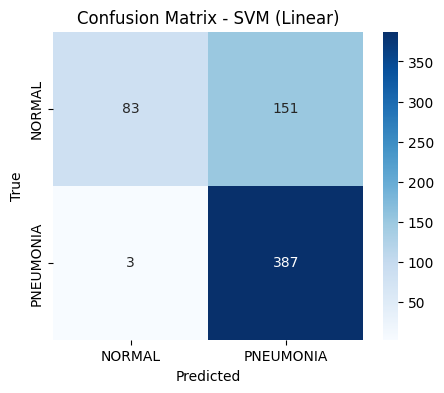


 Training: SVM (RBF)
 SVM (RBF) Accuracy: 0.7740
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.95      0.42      0.58       234
   PNEUMONIA       0.74      0.99      0.85       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.75       624



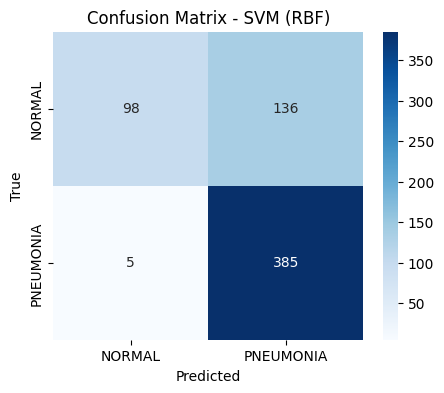


 Training: Random Forest
 Random Forest Accuracy: 0.7708
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.96      0.41      0.57       234
   PNEUMONIA       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



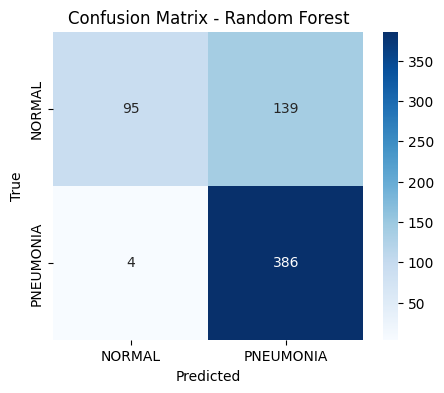


 Training: KNN (k=5)
 KNN (k=5) Accuracy: 0.7308
Classification Report:
               precision    recall  f1-score   support

      NORMAL       1.00      0.28      0.44       234
   PNEUMONIA       0.70      1.00      0.82       390

    accuracy                           0.73       624
   macro avg       0.85      0.64      0.63       624
weighted avg       0.81      0.73      0.68       624



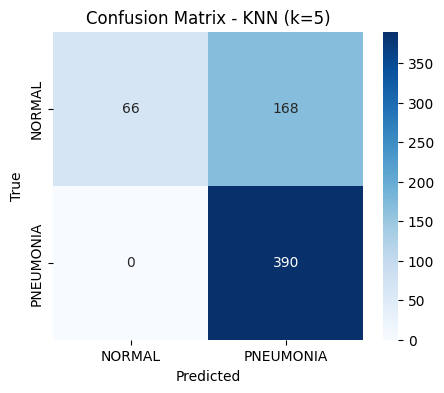

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paths
TRAIN_DIR = r"C:\Users\SANTOSH KUMAR SAHOO\Downloads\archive (6)\chest_xray\train"
TEST_DIR  = r"C:\Users\SANTOSH KUMAR SAHOO\Downloads\archive (6)\chest_xray\test"

categories = ["NORMAL", "PNEUMONIA"]

def load_data(folder):
    data, labels = [], []
    for idx, category in enumerate(categories):
        path = os.path.join(folder, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (100, 100))
                data.append(img.flatten())
                labels.append(idx)
            except Exception as e:
                print("Error loading:", img_path, e)
    return np.array(data), np.array(labels)

# Load train and test data
print("Loading training data...")
X_train, y_train = load_data(TRAIN_DIR)
print("Loading testing data...")
X_test, y_test = load_data(TEST_DIR)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Train & Evaluate
for name, model in models.items():
    print("\n Training:", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f" {name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=categories, yticklabels=categories)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



In [2]:
import cv2
print(cv2.__version__)



4.12.0
